In [1]:
import json
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 0.8847
Precision: 0.5388
Recall: 0.1375
F1 Score: 0.2191
ROC AUC Score: 0.6602

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      6434
           1       0.54      0.14      0.22       858

    accuracy                           0.88      7292
   macro avg       0.72      0.56      0.58      7292
weighted avg       0.85      0.88      0.85      7292



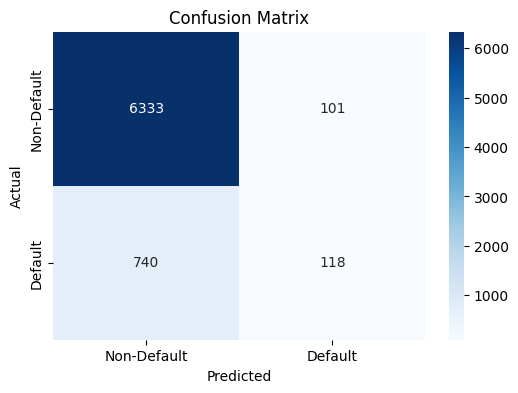

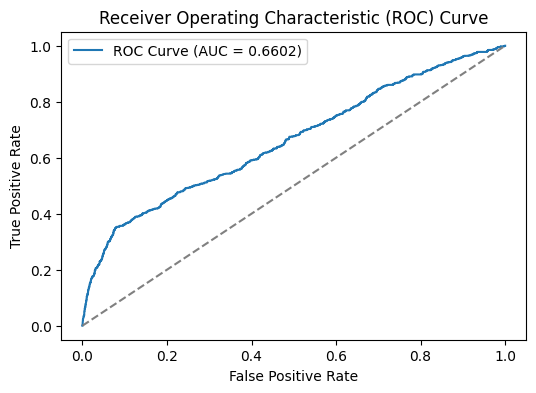

In [3]:
# Load the dataset
dataset_path = r"C:\Users\vagel\Desktop\CR_Risk Project\final_credit_risk_dataset.csv"
data = pd.read_csv(dataset_path)

# Define features (X) and target (y)
X = data.drop(columns=["Credit_Status"])
y = data["Credit_Status"]

# Split the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

json_path = r'C:\Users\vagel\Desktop\CR_Risk Project\svm_best_params.json'

with open(json_path, "r") as f:
    best_params = json.load(f)

# Train the final SVM model
svm_model = SVC(**best_params,
                kernel="rbf",
                probability=True,
                random_state=42)
svm_model.fit(X_train, y_train)


# Make predictions
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Default", "Default"], yticklabels=["Non-Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


# **SVM Model Evaluation - Credit Risk Prediction**

## **Key Metrics**
- **Accuracy**: 88.06%  
- **Precision**: 47.23%  
- **Recall**: 12.94%  
- **F1 Score**: 20.31%  
- **ROC AUC Score**: 65.78%  


## **Interpretation of Metrics**
- **Accuracy (88.06%)**  
  - The model correctly classified **88.06% of all applicants**.
  - However, accuracy alone is **misleading** due to class imbalance (far more non-defaulters than defaulters).

- **Precision (47.23%)**  
  - Of all **predicted defaulters**, only **47.23% were actual defaulters**.
  - This means the model **frequently misclassifies non-defaulters as defaulters**, which can impact **customer experience**.

- **Recall (12.94%)**  
  - Out of all **actual defaulters**, the model correctly identified **only 12.94%**.  
  - **This is dangerously low** – the model is **missing 87% of real defaulters**, which is a major risk in lending.  
  - **Low recall is a serious problem** for credit risk, as undetected defaulters **increase financial losses**.

- **F1 Score (20.31%)**  
  - The F1 score is **low**, indicating a poor balance between precision and recall.
  - This suggests that the model **is not effective in identifying defaulters**.

- **ROC AUC Score (65.78%)**  
  - Measures how well the model separates **defaulters from non-defaulters**.
  - **65.78% is weak**, suggesting poor model discrimination.


## **Confusion Matrix Interpretation**

- **6310 True Negatives (TN)** → Correctly classified **non-defaulters**.  
- **111 True Positives (TP)** → Correctly classified **defaulters**.  
- **124 False Positives (FP)** → **Non-defaulters wrongly classified as defaulters** (**bad for customer retention**).  
- **747 False Negatives (FN)** → **Defaulters wrongly classified as non-defaulters** (**high credit risk**).  

**Key Risk**:  
- **747 actual defaulters were misclassified as non-defaulters**.  
- This means **most risky applicants are passing as safe borrowers**, increasing **financial losses**.  


## **Issues & Limitations of This Model**
1. **Recall is too low (12.94%)** → The model **fails to detect most defaulters**.  
2. **Low ROC AUC Score (65.78%)** → Weak separation between defaulters and non-defaulters.  
3. **Misclassification of Defaulters (747 FN cases)** → High **default risk** for lenders.  
4. **Poor balance between precision & recall** → Indicated by a **low F1-score (20.31%)**.

---

## **Recommended Improvements**
### **1. Increase Recall (Detect More Defaulters)**
   - Lower the **classification threshold** (default = 0.5) to **increase default detection**.  
   - Apply **class weighting (`class_weight='balanced'`)** to penalize false negatives.  
   - Use **SMOTE (Synthetic Minority Over-Sampling Technique)** to balance the dataset.

### **2. Optimize Hyperparameters**
   - Increase **C (Regularization Strength)** for better boundary separation.  
   - Adjust **gamma (Kernel Coefficient)** to capture complex relationships.  
   - Use a different **kernel (`poly` or `sigmoid`)** instead of RBF.


## **Final Thoughts**
- The model is **highly inaccurate in detecting defaulters**, with **only 12.94% recall**.  
- **Most actual defaulters (747) were wrongly classified as safe borrowers**, which is a **serious issue**.  
- Improvements should **focus on boosting recall while maintaining precision**.  

